<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(3_6)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.6_n250.csv',
 'data_multi_delta_3.6_n20.csv',
 'data_multi_delta_3.6_n120.csv',
 'data_multi_delta_3.6_n60.csv',
 'data_multi_delta_3.6_n30.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,90.006768,5436.957921,5536.964689,796.281774,4740.682915
1,0.0,1.0,49.472412,-1906.245112,-1846.772700,251.180956,-2097.953656
2,0.0,2.0,90.283428,-3900.595180,-3800.311752,800.002262,-4600.314014
3,0.0,3.0,40.152704,-519.548063,-469.395359,125.850724,-595.246082
4,0.0,4.0,97.780391,-1796.084122,-1688.303730,900.820459,-2589.124190
...,...,...,...,...,...,...,...
119995,999.0,115.0,84.584748,-661.439001,-566.854253,577.455919,-1144.310172
119996,999.0,116.0,53.597724,264.478622,328.076345,319.044779,9.031566
119997,999.0,117.0,46.242402,810.284976,866.527378,257.706298,608.821080
119998,999.0,118.0,82.895745,-333.458746,-240.563001,563.370757,-803.933759


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,90.006768,5436.957921,5536.964689,796.281774,4740.682915
1,0.0,1.0,49.472412,-1906.245112,-1846.772700,251.180956,-2097.953656
2,0.0,2.0,90.283428,-3900.595180,-3800.311752,800.002262,-4600.314014
3,0.0,3.0,40.152704,-519.548063,-469.395359,125.850724,-595.246082
4,0.0,4.0,97.780391,-1796.084122,-1688.303730,900.820459,-2589.124190
...,...,...,...,...,...,...,...
119995,999.0,115.0,84.584748,-661.439001,-566.854253,577.455919,-1144.310172
119996,999.0,116.0,53.597724,264.478622,328.076345,319.044779,9.031566
119997,999.0,117.0,46.242402,810.284976,866.527378,257.706298,608.821080
119998,999.0,118.0,82.895745,-333.458746,-240.563001,563.370757,-803.933759


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    90.006768  5436.957921  5536.964689  796.281774  4740.682915
      1.0    49.472412 -1906.245112 -1846.772700  251.180956 -2097.953656
      2.0    90.283428 -3900.595180 -3800.311752  800.002262 -4600.314014
      3.0    40.152704  -519.548063  -469.395359  125.850724  -595.246082
      4.0    97.780391 -1796.084122 -1688.303730  900.820459 -2589.124190
...                ...          ...          ...         ...          ...
999.0 115.0  84.584748  -661.439001  -566.854253  577.455919 -1144.310172
      116.0  53.597724   264.478622   328.076345  319.044779     9.031566
      117.0  46.242402   810.284976   866.527378  257.706298   608.821080
      118.0  82.895745  -333.458746  -240.563001  563.370757  -803.933759
      119.0  86.599524 -4908.520023 -4811.920500  594.257806 -5406.178305

[120000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    90.006768  5436.957921  5536.964689  796.281774  4740.682915
      1.0    49.472412 -1906.245112 -1846.772700  251.180956 -2097.953656
      2.0    90.283428 -3900.595180 -3800.311752  800.002262 -4600.314014
      3.0    40.152704  -519.548063  -469.395359  125.850724  -595.246082
      4.0    97.780391 -1796.084122 -1688.303730  900.820459 -2589.124190
...                ...          ...          ...         ...          ...
999.0 115.0  84.584748  -661.439001  -566.854253  577.455919 -1144.310172
      116.0  53.597724   264.478622   328.076345  319.044779     9.031566
      117.0  46.242402   810.284976   866.527378  257.706298   608.821080
      118.0  82.895745  -333.458746  -240.563001  563.370757  -803.933759
      119.0  86.599524 -4908.520023 -4811.920500  594.257806 -5406.178305

[120000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,90.006768,5436.957921,5536.964689,796.281774,4740.682915
1,0.0,1.0,49.472412,-1906.245112,-1846.772700,251.180956,-2097.953656
2,0.0,2.0,90.283428,-3900.595180,-3800.311752,800.002262,-4600.314014
3,0.0,3.0,40.152704,-519.548063,-469.395359,125.850724,-595.246082
4,0.0,4.0,97.780391,-1796.084122,-1688.303730,900.820459,-2589.124190
...,...,...,...,...,...,...,...
119995,999.0,115.0,84.584748,-661.439001,-566.854253,577.455919,-1144.310172
119996,999.0,116.0,53.597724,264.478622,328.076345,319.044779,9.031566
119997,999.0,117.0,46.242402,810.284976,866.527378,257.706298,608.821080
119998,999.0,118.0,82.895745,-333.458746,-240.563001,563.370757,-803.933759


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    90.006768  5436.957921  5536.964689  796.281774  4740.682915
      1.0    49.472412 -1906.245112 -1846.772700  251.180956 -2097.953656
      2.0    90.283428 -3900.595180 -3800.311752  800.002262 -4600.314014
      3.0    40.152704  -519.548063  -469.395359  125.850724  -595.246082
      4.0    97.780391 -1796.084122 -1688.303730  900.820459 -2589.124190
...                ...          ...          ...         ...          ...
999.0 115.0  84.584748  -661.439001  -566.854253  577.455919 -1144.310172
      116.0  53.597724   264.478622   328.076345  319.044779     9.031566
      117.0  46.242402   810.284976   866.527378  257.706298   608.821080
      118.0  82.895745  -333.458746  -240.563001  563.370757  -803.933759
      119.0  86.599524 -4908.520023 -4811.920500  594.257806 -5406.178305

[120000 rows x 5 columns]

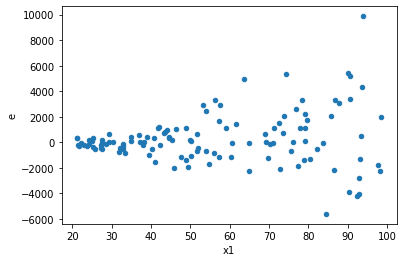

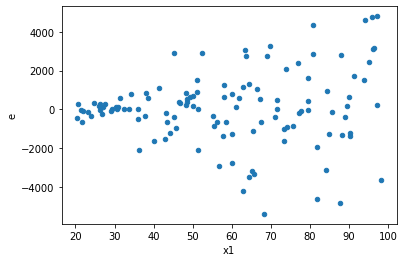

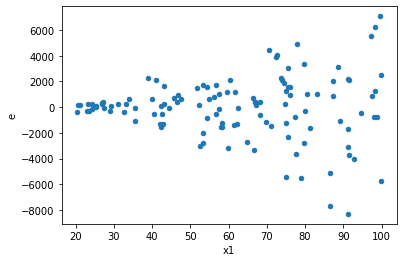

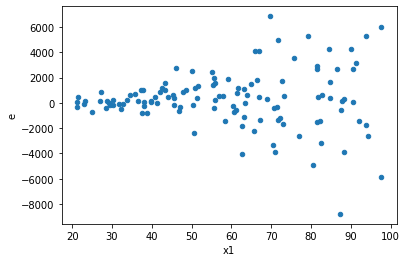

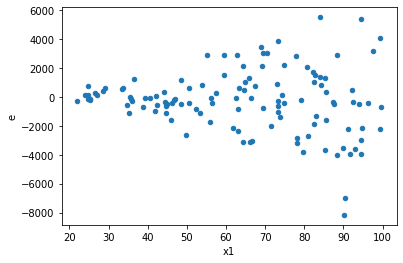

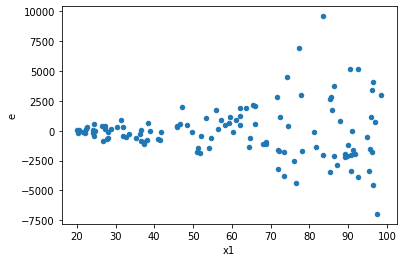

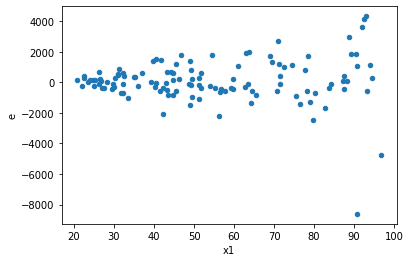

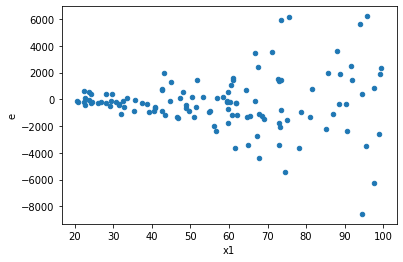

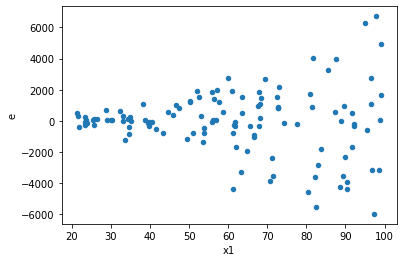

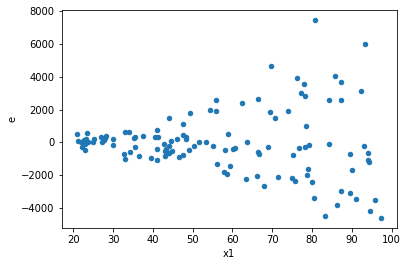

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,47.0,47.0,12375004.504611617,409513595.21698195,263297.9681832259,8713055.217382595,33.09199564851668,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
1.0,47.0,47.0,27735247.86351867,270570718.487993,590111.65667061,5756823.797616872,9.75548225923324,1.141975403129436e-12,0.999999999999429,5.70987701564718e-13,Reject001=0 : Heteroscedasticity
3.0,47.0,47.0,31048213.352169245,512717502.5451446,660600.2840887073,10908883.032875417,16.513591192174754,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
6.0,47.0,47.0,19484414.35762717,209410077.96140537,414562.0076090887,4455533.573646923,10.747568498482062,1.7275070263167436e-13,0.9999999999999136,8.637535131583718e-14,Reject001=0 : Heteroscedasticity
7.0,47.0,47.0,19356766.61941031,473291438.4242222,411846.09828532574,10070030.604770685,24.450955458109494,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
10.0,47.0,47.0,30513012.522790737,401098408.58074534,649213.0323998029,8534008.693207348,13.145159242508667,3.1086244689504383e-15,0.9999999999999984,1.5543122344752192e-15,Reject001=0 : Heteroscedasticity
11.0,47.0,47.0,20903271.28859326,342005451.5623536,444750.4529487927,7276711.735369226,16.361336311459688,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
15.0,47.0,47.0,15077295.388221933,473816764.82556033,320793.518898339,10081207.762245964,31.42584612328389,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
17.0,47.0,47.0,21845927.439338297,463893698.341704,464806.96679443185,9870078.688121362,21.234790769576737,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,47.0,47.0,12375004.504611617,409513595.21698195,263297.9681832259,8713055.217382595,33.09199564851668,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,47.0,47.0,27735247.86351867,270570718.487993,590111.65667061,5756823.797616872,9.75548225923324,1.141975403129436e-12,Reject001=0 : Heteroscedasticity
2.0,47.0,47.0,578274295.9166317,54437833.93783721,12303708.423758121,1158251.7859114301,0.0941384293271188,2.173441239568034e-13,Reject001=0 : Heteroscedasticity
3.0,47.0,47.0,31048213.352169245,512717502.5451446,660600.2840887073,10908883.032875417,16.513591192174754,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,47.0,47.0,391298040.36004996,43414693.54476294,8325490.220426595,923716.8839311263,0.11095044970022143,5.209489877457046e-12,Reject001=0 : Heteroscedasticity
5.0,47.0,47.0,524756636.6099815,20558437.82539099,11165034.821488967,437413.5707529998,0.03917708970429045,2.4911019193877158e-21,Reject001=0 : Heteroscedasticity
6.0,47.0,47.0,19484414.35762717,209410077.96140537,414562.0076090887,4455533.573646923,10.747568498482062,1.7275070263167436e-13,Reject001=0 : Heteroscedasticity
7.0,47.0,47.0,19356766.61941031,473291438.4242222,411846.09828532574,10070030.604770685,24.450955458109494,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,47.0,47.0,427285599.9826614,21991241.69522616,9091182.978354499,467898.759472897,0.05146731295442329,8.939581944111077e-19,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64